## Lithofacies Clssification Using Machine Learning Algorithms from Well Log data


Here we are going to implement standard and comprehensive steps to find the best model and hyperparameters in order to predict lithfacies from a well log dataset. Following ML algorithms are going to be used.

1. Decision Trees Classifier
2. Random Forest Classifier
3. Support Vector Machine Classifier
4. XgBoost Classifier

***The Dataset***

This dataset is from Hugoton and Panoma Fields in North America. It contains log records from 10 different wells. Each well consists of 7 differenet features (diffrenret logging method). They are: <br>

1. __GR__: Measures natural radioactivity of a formation<br>
2. __ILD_log10__: Measures resistivty of a formation<br>
3. __PE__: photoelectric effect log<br>
4. __DeltaPHI__: Measures neutron porosity.<br>
5. __PNHIND__: Average of neutron and density log.<br>
6. __NM_M__: Nonmarine-marine indicator<br>
7. __RELPOS__: Relative position<br>

It contains nine different types of facies or lithologies which are:<br>
1. (SS) Nonmarine sandstone<br>
2. (CSiS) Nonmarine coarse siltstone<br>
3. (FSiS) Nonmarine fine siltstone<br>
4. (SiSH) Marine siltstone and shale<br>
5. (MS) Mudstone (type of limestone)<br>
6. (WS) Wackestone (type of limestone)<br>
7. (Dol) Dolomite<br>
8. (PS) Packstone-grainstone (type of limestone)<br>
9. (BS) Phylloid-algal bafflestone (type of limestone)<br>

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

In [2]:
# dataframe
df = pd.read_csv(r'c:\Users\sanju\Desktop\AI-ML in Oil and Gas industry\facies_vectors.csv')
df.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


**1. EDA (Exploratory Data Analysis)**

***1.1 Data Visualization***

In [3]:
# statistical summury of the whole dataset by each column
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [4]:
# data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [5]:
# Percentage and No. of NaN values in each columns 
for col_name in df.columns:
    
    if df[col_name].isna().sum() == 0:
        print ('Column {0} has 0 NaN values or 0 % NaN values'.format(col_name))
    else:
        print ( 
            'Column {0} has {1} NaN values or {2} percent Nan values'.format( 
            col_name, df[col_name].isna().sum(), round(df[col_name].isna().mean()*100 ,2)
            )
    )

Column Facies has 0 NaN values or 0 % NaN values
Column Formation has 0 NaN values or 0 % NaN values
Column Well Name has 0 NaN values or 0 % NaN values
Column Depth has 0 NaN values or 0 % NaN values
Column GR has 0 NaN values or 0 % NaN values
Column ILD_log10 has 0 NaN values or 0 % NaN values
Column DeltaPHI has 0 NaN values or 0 % NaN values
Column PHIND has 0 NaN values or 0 % NaN values
Column PE has 917 NaN values or 22.1 percent Nan values
Column NM_M has 0 NaN values or 0 % NaN values
Column RELPOS has 0 NaN values or 0 % NaN values


In [6]:
# total number of wells 
print('Total number of wells:', df['Well Name'].nunique())

# Total number of records in each wells
lst_all = df['Well Name'].tolist()                # creating a list containing all well name values in the Well_Name column 
lst_unique = df['Well Name'].unique().tolist()    # List containing Well name

for well_name in lst_unique:                      # Creating a loop for reading number of times a well appears in the datset 
    count = 0                                     # seting an initiator at 0
    for well in lst_all:
        if well== well_name:
            count = count + 1
    print('Well {0} has {1} number of records'.format(well_name, count))
    
# All of the above code can be written in one line using df['Well Name'].value_counts() command


Total number of wells: 10
Well SHRIMPLIN has 471 number of records
Well ALEXANDER D has 466 number of records
Well SHANKLE has 449 number of records
Well LUKE G U has 461 number of records
Well KIMZEY A has 439 number of records
Well CROSS H CATTLE has 501 number of records
Well NOLAN has 415 number of records
Well Recruit F9 has 80 number of records
Well NEWBY has 463 number of records
Well CHURCHMAN BIBLE has 404 number of records


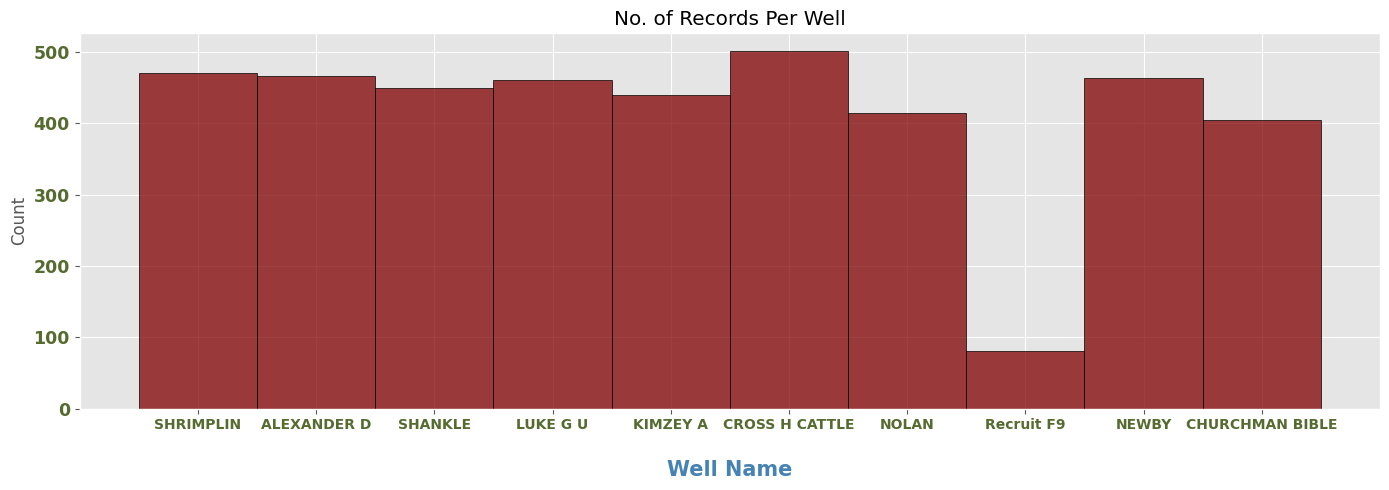

In [7]:
# Histogram plot
fig = plt.figure(figsize= (14,5))
sns.histplot(data= df, 
             x= df['Well Name'],
             stat= 'count', 
             color = 'maroon', edgecolor= 'black')

plt.xlabel('Well Name', color = 'steelblue', fontweight ='bold', fontsize = 15, labelpad= 20)

plt.title('No. of Records Per Well')
plt.yticks(color = 'darkolivegreen', fontsize= 12.5, fontweight = 'bold' )
plt.xticks(color = 'darkolivegreen', fontsize= 10, fontweight = 'bold' )

plt.tight_layout()

In [8]:
# Facies Distribuition
facies_label = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'Dol','PS', 'BS']
facies_count = []   # empty list for appending total number of occurences of each facies

label_count = 1
for label in facies_label:
    cond = df['Facies'] == label_count
    n = df[cond]['Facies'].value_counts().values.item()
    facies_count.append(n)
    print('{0} Facies has {1} number of occurences'.format(label, n))
    
    label_count = label_count + 1

SS Facies has 268 number of occurences
CSiS Facies has 940 number of occurences
FSiS Facies has 780 number of occurences
SiSh Facies has 271 number of occurences
MS Facies has 296 number of occurences
WS Facies has 582 number of occurences
Dol Facies has 141 number of occurences
PS Facies has 686 number of occurences
BS Facies has 185 number of occurences


Text(0.5, 1.0, 'Facies Distribuition')

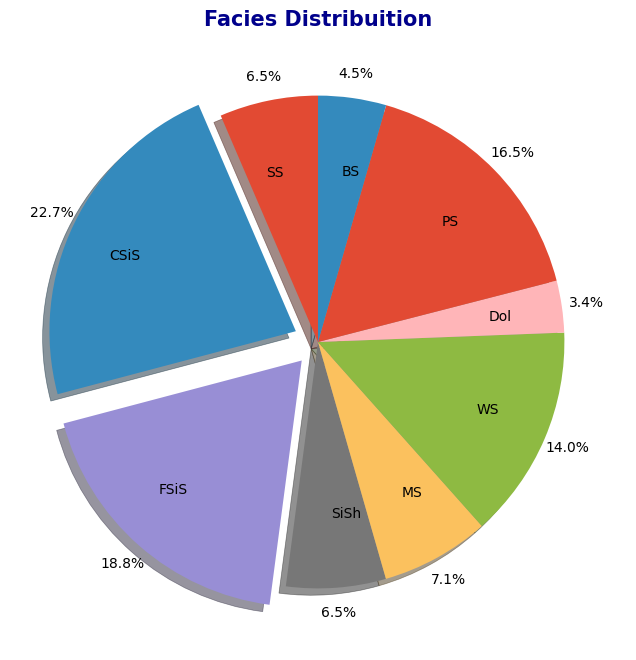

In [9]:
# Facies Distribuition plot
fig,axe = plt.subplots(figsize= (8,8))

axe.pie(x= facies_count, labels= facies_label, autopct= '%1.1f%%',
        startangle=90, shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},
        pctdistance=1.10, labeldistance=.7, explode= (0, 0.1, 0.1, 0, 0, 0, 0, 0, 0))

axe.set_title('Facies Distribuition', color = 'darkblue', fontsize= 15, fontweight = 'bold')

***1.2 Plotting the log***

We are going to plot log data of only one well

In [10]:
# Color for each facies 
facies_color = ['darkblue', 'maroon', 'peru', 'yellowgreen', 'lightseagreen', 
                'steelblue', 'blueviolet', 'deeppink', 'crimson']

# Assigning color to each facies
facies_label_color = { }
for idx, val in enumerate(facies_label):
    facies_label_color[val] = facies_color[idx] 
    
facies_label_color

{'SS': 'darkblue',
 'CSiS': 'maroon',
 'FSiS': 'peru',
 'SiSh': 'yellowgreen',
 'MS': 'lightseagreen',
 'WS': 'steelblue',
 'Dol': 'blueviolet',
 'PS': 'deeppink',
 'BS': 'crimson'}

In [23]:
data_tmp = df[cond].sort_values(by= 'Depth')

In [24]:
data_tmp

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
466,8,C LM,SHRIMPLIN,3026.0,17.92,0.808,1.5,9.730,5.4,2,0.049
467,8,C LM,SHRIMPLIN,3026.5,16.51,0.814,2.0,8.275,5.5,2,0.039
468,8,C LM,SHRIMPLIN,3027.0,21.94,0.820,3.3,7.680,5.4,2,0.029
469,8,C LM,SHRIMPLIN,3027.5,32.54,0.821,2.5,7.445,5.8,2,0.020


In [11]:
# Function for plotting the log
def log_plot(data2):
    
    depth_data = data2['Depth']                                        # Storing the depth values in another variable
    indx = 0                                                           # Starting an initiator index value
    
    data3 = data2[['GR','ILD_log10','DeltaPHI','PHIND','PE']]          # Taking out depth column and storing the rest into another variable
    
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize= (15,8),        # Creating subplots
                            sharey= True, layout='constrained')        
    
    
    for val in data3.columns:
        axes[indx].plot(data3[val], depth_data, linestyle = 'solid', 
        color = facies_color[indx],
        linewidth = 1)
        
        axes[indx].set_title(val, color = 'darkblue', 
                            fontsize= 12.5, fontweight = 'bold')       # title for every plot
        axes[indx].invert_yaxis()                                      # reversing the y axis
        
        axes[indx].set_xlim(data3[val].min(), data3[val].max())        # setting limits for x_axis and y_axis
        axes[indx].set_ylim(depth_data.max(), depth_data.min())
        
        indx = indx + 1                                                # Increment of the index
    
    fig.suptitle('Well: SHRIMPLIN', color = 'darkgreen',               # title of the figure
                            fontsize= 15, fontweight = 'bold')

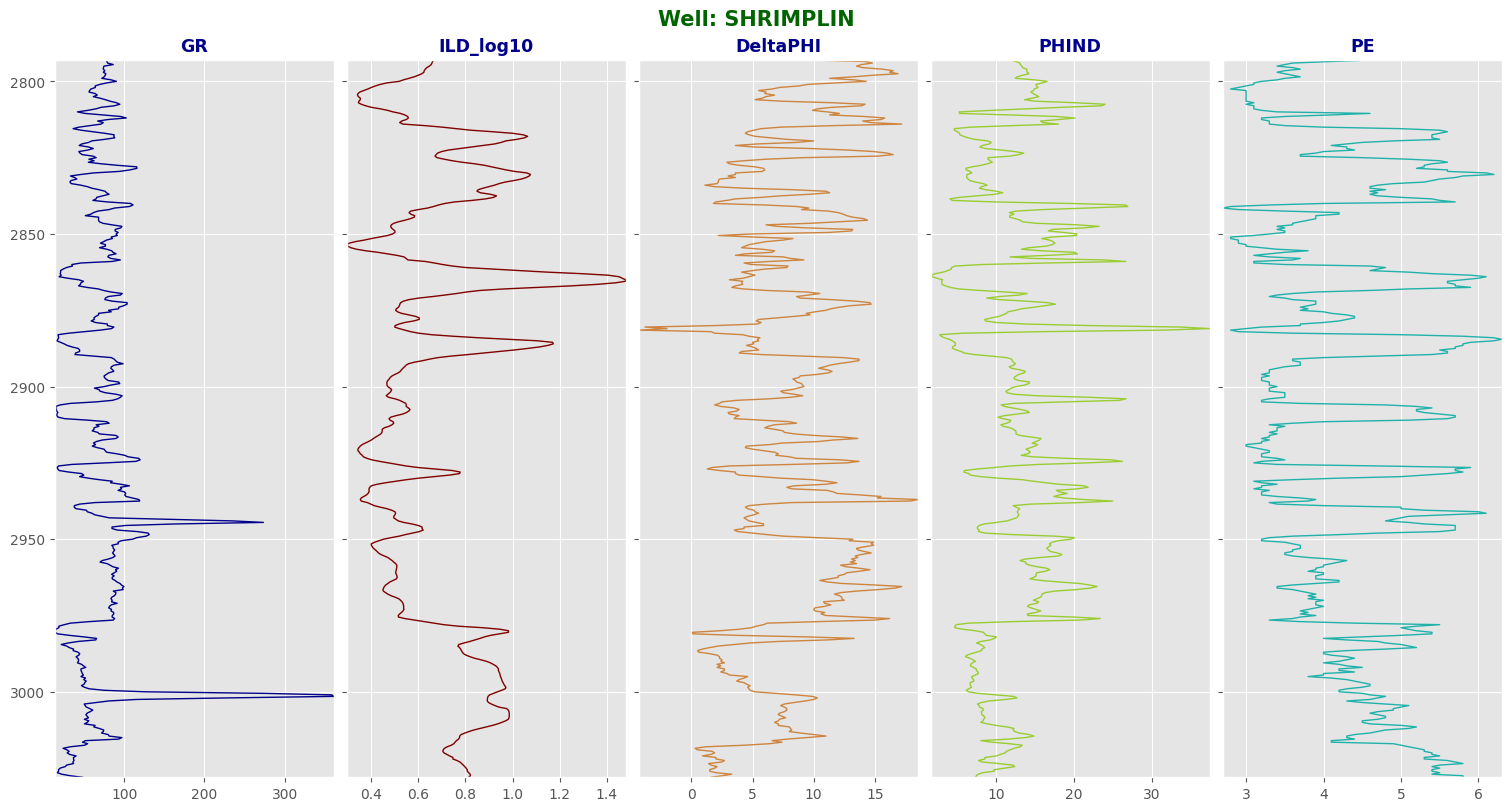

In [12]:
cond = df['Well Name'] == 'SHRIMPLIN'      # creating a condition for filtering only one well
data = df[cond].sort_values(by= 'Depth')   # sorting the dataset with respect to depth 

data2 = data[['Depth','GR','ILD_log10','DeltaPHI','PHIND','PE']] # taking the neccesary columns only

# calling the fucntion
log_plot(data2)